### **Métodos de Optimización**
#### Prácticas computacionales de "Programación No Lineal"

Instrucciones para los Ejercicios

1. **Trabajo en Grupo:**
   - Los ejercicios deben ser resueltos y entregados en grupo.
   - La cantidad de integrantes por grupo será definida el día de la actividad, así como la fecha límite para la entrega.

2. **Uso de Google Colab y Compartir:**
   - Este notebook debe ser copiado al GitHub o Google Drive de alguno de los integrantes del grupo.
   - El grupo será responsable de programar las soluciones, realizar las pruebas y enviar el trabajo final al profesor.

3. **Implementación de los Ejercicios:**
   - Cada ejercicio debe ser implementado de manera que cumpla con los objetivos específicos descritos en cada problema.
   - El código debe devolver claramente la información calculada de acuerdo a lo solicitado.

4. **Calidad del Código:**
   - El código debe ejecutarse sin errores.
   - Es obligatorio incluir **comentarios explicativos** para describir las ideas y conceptos implícitos en el código, facilitando la comprensión de su lógica.

5. **Envío del Trabajo:**
   - Una vez completado, el notebook debe ser enviado a través de Moodle.
   - En caso de dudas, pueden contactarme por correo electrónico a **marcelo.danesi@utec.edu.uy**.

6. **Orientaciones Adicionales:**
   - Asegúrense de que todas las celdas de código hayan sido ejecutadas antes de enviar.
   - Incluyan el nombre completo y correo electrónico de todos los integrantes al inicio del notebook.
   - Si utilizan referencias externas, menciónenlas de forma adecuada.

¡Buena suerte y aprovechen la práctica para consolidar los conceptos de métodos optimización!

#### **Programación No Lineal**



#### **1) Método de búsqueda lineal**

En búsqueda lineal se elige una **dirección de descenso** $d_k$ y un **paso** $\alpha_k>0$:
$$x_{k+1}=x_k+\alpha_k d_k,\qquad \phi(\alpha)=f(x_k+\alpha d_k).$$

El paso puede obtenerse por **búsqueda exacta** (1D) o por **criterios de Armijo/Wolfe** (backtracking).

**Criterios prácticos para elegir el paso $\alpha_k$:**

- **Condición de Armijo (suficiente descenso):**
$$f(x_k+\alpha d_k)\;\leq\; f(x_k)+c\,\alpha\,\nabla f(x_k)^\top d_k,$$
con $0<c<1$.  
Garantiza que la reducción en $f$ es proporcional a la predicha por el gradiente.

- **Condiciones de Wolfe:**   
además de Armijo, exigen curvatura adecuada:  
$$
\nabla f(x_k+\alpha d_k)^\top d_k \;\geq\; c_2 \,\nabla f(x_k)^\top d_k,
$$
con $0<c<c_2<1$.  
Aseguran que el paso no sea demasiado corto y que la dirección siga siendo de descenso.

En la práctica, se usan métodos de **backtracking** (reducir $\alpha$ multiplicando por $\rho\in(0,1)$) hasta cumplir Armijo, o bien funciones como `line_search` en SciPy que implementan Wolfe.


##### **Ejemplo: Rosenbrock con Armijo (dirección por gradiente)**

**Descripción del problema:**  
La función de Rosenbrock
$$f(x,y)=100\,(y-x^2)^2+(1-x)^2$$
presenta un valle angosto que complica métodos de primer orden.

**Objetivos:**
1. Implementar GD+Armijo desde $x_0=(-1.2,1.0)$ con $d_k=-\nabla f(x_k)$.
2. Graficar contornos ($\geq 100$ niveles) y la trayectoria.
3. Reportar iteraciones, $\|\nabla f(x_k)\|$ final y $f(x_k)$ final.

**Pistas:**
- Implementá `f_rosen` y `g_rosen`.
- Ajustá `alpha0`, `rho`, `c` si el backtracking es muy conservador.

**Entrega esperada:**
- Código, métricas (iteraciones, norma del gradiente final, valor de $f$).
- Gráfico de contornos con la trayectoria.

[Rosenbrock + Armijo] Iteraciones: 10000, ||grad|| final ≈ 2.377e-05, f(x) ≈ 2.709776e-10
[Rosenbrock + Armijo] x* ≈ [0.99998357 0.99996704]


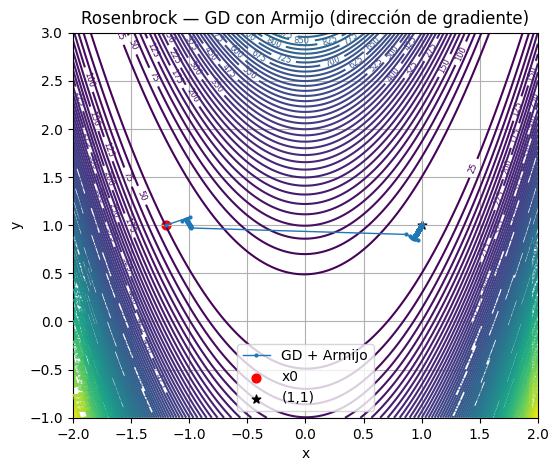

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f_rosen(v):
    x,y=v; return 100*(y - x**2)**2 + (1 - x)**2

def g_rosen(v):
    x,y=v; return np.array([-400*x*(y - x**2) - 2*(1 - x), 200*(y - x**2)])

def gd_armijo(f, grad, x0, alpha0=1.0, rho=0.5, c=1e-4,
              max_back=25, max_iter=10000, tol=1e-8, record=True):
    x = np.array(x0, dtype=float)
    traj = [x.copy()] if record else None
    for k in range(max_iter):
        g = grad(x); ng = np.linalg.norm(g)
        if ng < tol: break
        alpha = alpha0; fx = f(x)
        # Backtracking de Armijo
        for _ in range(max_back):
            x_new = x - alpha*g
            if f(x_new) <= fx - c*alpha*(ng**2):
                x = x_new; break
            alpha *= rho
        if record: traj.append(x.copy())
    return x, f(x), (np.array(traj) if record else None), (k+1), ng

# Ejecución del ejemplo guiado
x0 = np.array([-1.2, 1.0])
x_fin, f_fin, path, iters, ng = gd_armijo(f_rosen, g_rosen, x0)
print(f"[Rosenbrock + Armijo] Iteraciones: {iters}, ||grad|| final ≈ {ng:.3e}, f(x) ≈ {f_fin:.6e}")
print(f"[Rosenbrock + Armijo] x* ≈ {x_fin}")

# Gráfico de contornos + trayectoria
xx = np.linspace(-2, 2, 600); yy = np.linspace(-1, 3, 600)
XX, YY = np.meshgrid(xx, yy)
ZZ = 100*(YY - XX**2)**2 + (1 - XX)**2

plt.figure(figsize=(6,5))
cs = plt.contour(XX, YY, ZZ, levels=100)
plt.clabel(cs, inline=True, fontsize=6)
plt.plot(path[:,0], path[:,1], 'o-', lw=1, ms=2, label="GD + Armijo")
plt.scatter([x0[0]],[x0[1]], c='r', s=40, label="x0")
plt.scatter([1],[1], c='k', s=40, marker='*', label="(1,1)")
plt.title("Rosenbrock — GD con Armijo (dirección de gradiente)")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(True); plt.show()

##### **Tarea 1: Búsqueda lineal con direcciones aleatorias descendentes (sin gradiente como dirección).**

**Descripción:**   
En una cuadrática $f(x)=\tfrac12 x^\top Qx + b^\top x$ con $Q\succ 0$ (2D), usá **direcciones aleatorias** $u_k$ y forzá descenso:
$$d_k=\begin{cases}
u_k,&\text{si } \nabla f(x_k)^\top u_k<0,\\
-u_k,&\text{en caso contrario.}
\end{cases}$$

Luego aplicá **backtracking de Armijo** para el paso $\alpha_k$.

**Objetivos:**
1. Generar $Q=\begin{bmatrix}4&1\\1&3\end{bmatrix}$ y un $b$ a elección.
2. Implementar el algoritmo (direcciones aleatorias descendentes + Armijo, **sin** usar el gradiente como dirección).
3. Graficar contornos y la trayectoria; reportar iteraciones y $f$ final.
4. (Opcional) Comparar con $x^*=-Q^{-1}b$.

**Pistas:**
- normalizá $u_k$; verificá $Q\succ0$ con autovalores positivos.

**Entrega esperada:**   
- código, $x_{\text{final}}$, $f(x_{\text{final}})$, gráfico,
- en esta tarea **no** se permite $d_k=-\nabla f(x_k)$; el gradiente se usa solo para evaluar el criterio de Armijo.

**Sugerencia de plantilla (completá los Objetivos):**
```python
def quad_Qb(Q, b):
    def f(v): return 0.5*v@Q@v + b@v
    def g(v): return Q@v + b
    return f, g

def random_dir_descent(f, g, x0, alpha0=1.0, rho=0.5, c=1e-4,
                       max_back=20, max_iter=500, tol=1e-8, seed=None):
    if seed is not None:
        np.random.seed(seed)
    x = np.array(x0, dtype=float)
    path=[x.copy()]
    for k in range(max_iter):
        grad = g(x); ng = np.linalg.norm(grad)
        if ng < tol:
            break
        # direção aleatória unitária
        u = np.random.randn(*x.shape)
        u /= (np.linalg.norm(u) + 1e-15)
        # força ser descendente
        d = u if grad @ u < 0 else -u
        # backtracking Armijo padrão: f(x+αd) <= f(x) + c α grad^T d
        alpha = alpha0; fx = f(x); gd = grad @ d  # < 0
        for _ in range(max_back):
            x_new = x + alpha*d
            if f(x_new) <= fx + c*alpha*gd:
                x = x_new
                break
            alpha *= rho
        path.append(x.copy())
    return x, f(x), np.array(path)


# Ejemplo de uso (opcional para probar rápidamente):
# Q = np.array([[4.0,1.0],[1.0,3.0]]); b = np.array([-2.0,1.0]); x0=np.array([2.0,-1.0])
# fQ,gQ=quad_Qb(Q,b); xf,ff,path = random_dir_descent(fQ,gQ,x0)
# print("xf=",xf," f(xf)=",ff)
```


xf= [ 2.63636341 -2.54545528]  f(xf)= -16.90909090908985
[Cuadrática + Dir. aleatorias] Iteraciones: 200
||grad|| final ≈ 7.042e-08, f(x) ≈ -1.690909e+01
x* numérico ≈ [ 2.63636363 -2.54545457]
x* teórico ≈ [ 2.63636364 -2.54545455]


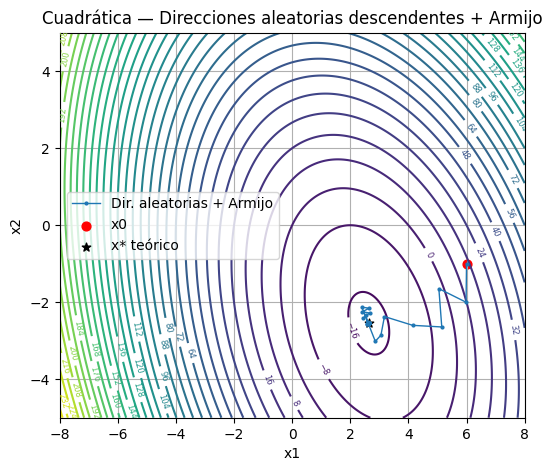

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def quad_Qb(Q, b):
    def f(v): return 0.5*v@Q@v + b@v
    def g(v): return Q@v + b
    return f, g

def random_dir_descent(f, g, x0, alpha0=1.0, rho=0.5, c=1e-4,
                       max_back=20, max_iter=500, tol=1e-8, seed=None):
    if seed is not None:
        np.random.seed(seed)
    x = np.array(x0, dtype=float)
    path=[x.copy()]
    for k in range(max_iter):
        grad = g(x); ng = np.linalg.norm(grad)
        if ng < tol:
            break
        # direção aleatória unitária
        u = np.random.randn(*x.shape)
        u /= (np.linalg.norm(u) + 1e-15)
        # força ser descendente
        d = u if grad @ u < 0 else -u
        # backtracking Armijo padrão: f(x+αd) <= f(x) + c α grad^T d
        alpha = alpha0; fx = f(x); gd = grad @ d  # < 0
        for _ in range(max_back):
            x_new = x + alpha*d
            if f(x_new) <= fx + c*alpha*gd:
                x = x_new
                break
            alpha *= rho
        path.append(x.copy())
    return x, f(x), np.array(path)


# Ejemplo de uso (opcional para probar rápidamente):
Q = np.array([[4.0,1.0],[1.0,3.0]])
b = np.array([-8.0,5.0])
x0=np.array([6.0,-1.0])
fQ,gQ=quad_Qb(Q,b); xf,ff,path = random_dir_descent(fQ,gQ,x0)
print("xf=",xf," f(xf)=",ff)

# --- Ejecución ---
x_fin, f_fin, path, iters, ng = random_dir_armijo(f_quad, grad_f, x0)

print(f"[Cuadrática + Dir. aleatorias] Iteraciones: {iters}")
print(f"||grad|| final ≈ {ng:.3e}, f(x) ≈ {f_fin:.6e}")
print(f"x* numérico ≈ {x_fin}")

# Comparación con el óptimo teórico: x* = -Q^{-1}b
x_opt = -np.linalg.inv(Q) @ b
print(f"x* teórico ≈ {x_opt}")

# --- Gráfico de contornos + trayectoria ---
xx = np.linspace(-8, 8, 400)
yy = np.linspace(-5, 5, 400)
XX, YY = np.meshgrid(xx, yy)

ZZ = 0.5*(Q[0,0]*XX**2 + 2*Q[0,1]*XX*YY + Q[1,1]*YY**2) + b[0]*XX + b[1]*YY

plt.figure(figsize=(6,5))
cs = plt.contour(XX, YY, ZZ, levels=40)
plt.clabel(cs, inline=True, fontsize=6)
plt.plot(path[:,0], path[:,1], 'o-', lw=1, ms=2, label="Dir. aleatorias + Armijo")
plt.scatter([x0[0]],[x0[1]], c='r', s=40, label="x0")
plt.scatter([x_opt[0]],[x_opt[1]], c='k', s=40, marker='*', label="x* teórico")
plt.title("Cuadrática — Direcciones aleatorias descendentes + Armijo")
plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(); plt.grid(True)
plt.show()

##### **Tarea 2: Búsqueda por descenso coordinado cíclico (sin gradiente como dirección).**


**Descripción:**   
En la misma cuadrática $f(x)=\tfrac12 x^\top Qx + b^\top x$, implementá **descenso coordinado cíclico**:   
elegí alternadamente $d_k=e_1$ y $d_{k+1}=e_2$ (o sus negaciones para asegurar descenso) y realizá una búsqueda lineal 1D (Armijo o exacta).

**Objetivos:**
1. Implementar el ciclo de coordenadas y backtracking/solución 1D exacta.
2. Graficar contornos + trayectoria desde $x_0$.
3. Comparar con la solución cerrada $x^*=-Q^{-1}b$.

**Pistas:** para **exacta 1D** en cuadrática, $\alpha^*=-\frac{\nabla f(x)^\top d}{d^\top Q d}$.

**Entrega esperada:** código, $x_{\text{final}}$, $f(x_{\text{final}})$, gráfico.

[Cuadrática + Descenso coordinado] Iteraciones: 19
||grad|| final ≈ 5.427e-09, f(x) ≈ -9.090909e-01
x* numérico ≈ [ 0.63636363 -0.54545454]
x* teórico ≈ [ 0.63636364 -0.54545455]


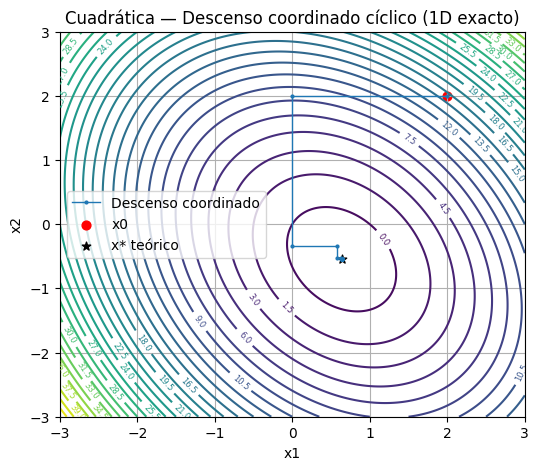

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- Función cuadrática ---
Q = np.array([[4.0, 1.0],
              [1.0, 3.0]])
b = np.array([-2.0, 1.0])

def f_quad(x):
    return 0.5 * x @ Q @ x + b @ x

def grad_f(x):
    return Q @ x + b

# --- Descenso coordinado cíclico ---
def coord_descent(Q, b, x0, max_iter=200, tol=1e-8):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    dlist = [np.array([1.0,0.0]), np.array([0.0,1.0])]  # e1, e2
    k = 0

    for it in range(max_iter):
        g = grad_f(x)
        if np.linalg.norm(g) < tol:
            break

        # Dirección alternada
        d = dlist[k % 2]
        # Forzar descenso
        if g @ d > 0:
            d = -d

        # Paso exacto en dirección d
        alpha = -(g @ d) / (d @ Q @ d)
        x = x + alpha * d

        path.append(x.copy())
        k += 1

    return x, f_quad(x), np.array(path), it+1, np.linalg.norm(grad_f(x))

# --- Ejecución ---
x0 = np.array([2.0, 2.0])
x_fin, f_fin, path, iters, ng = coord_descent(Q, b, x0)

print(f"[Cuadrática + Descenso coordinado] Iteraciones: {iters}")
print(f"||grad|| final ≈ {ng:.3e}, f(x) ≈ {f_fin:.6e}")
print(f"x* numérico ≈ {x_fin}")

# Óptimo teórico
x_opt = -np.linalg.inv(Q) @ b
print(f"x* teórico ≈ {x_opt}")

# --- Gráfico ---
xx = np.linspace(-3, 3, 400)
yy = np.linspace(-3, 3, 400)
XX, YY = np.meshgrid(xx, yy)

ZZ = 0.5*(Q[0,0]*XX**2 + 2*Q[0,1]*XX*YY + Q[1,1]*YY**2) + b[0]*XX + b[1]*YY

plt.figure(figsize=(6,5))
cs = plt.contour(XX, YY, ZZ, levels=40)
plt.clabel(cs, inline=True, fontsize=6)
plt.plot(path[:,0], path[:,1], 'o-', lw=1, ms=2, label="Descenso coordinado")
plt.scatter([x0[0]],[x0[1]], c='r', s=40, label="x0")
plt.scatter([x_opt[0]],[x_opt[1]], c='k', s=40, marker='*', label="x* teórico")
plt.title("Cuadrática — Descenso coordinado cíclico (1D exacto)")
plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(); plt.grid(True)
plt.show()


#### **2) Método de Newton-Raphson**

Newton usa gradiente y **Hessiana**:
$$x_{k+1}=x_k - [\nabla^2 f(x_k)]^{-1}\,\nabla f(x_k).$$

Convergencia cuadrática cerca de un mínimo si $\nabla^2 f(x^*)\succ0$.    
Puede fallar si la Hessiana no es definida positiva → combinar con búsqueda lineal o región de confianza.

##### **Ejemplo 2: Newton-CG en Rosenbrock.**

**Objetivos:**
1. Implementar gradiente y **Hessiana analítica**.
2. Usar `scipy.optimize.minimize(..., method="Newton-CG")` con `callback`.
3. Graficar contornos + trayectoria; reportar $\|\nabla f\|$ final y #iteraciones.

**Entrega esperada:**
- código, gráfico y métricas.

[Newton-CG] x*≈[1. 1.], f*≈1.316512e-19, iters:85, ||grad||≈3.243e-10


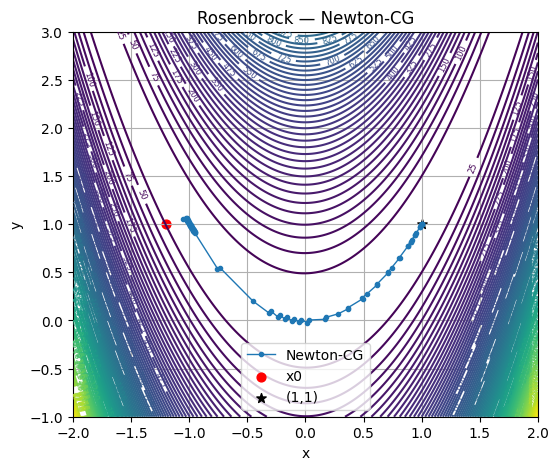

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f_rosen(v):
    x,y=v; return 100*(y - x**2)**2 + (1 - x)**2

def g_rosen(v):
    x,y=v; return np.array([-400*x*(y - x**2) - 2*(1 - x), 200*(y - x**2)])

def H_rosen(v):
    x,y=v; return np.array([[1200*x**2 - 400*y + 2, -400*x],
                            [-400*x,                 200   ]])

_tray=[]
def _cb(xk): _tray.append(xk.copy())

x0 = np.array([-1.2,1.0])
res = minimize(f_rosen, x0, jac=g_rosen, hess=H_rosen,
               method="Newton-CG", callback=_cb,
               options={"xtol":1e-10,"maxiter":200})
_tray = np.array(_tray)
print(f"[Newton-CG] x*≈{res.x}, f*≈{res.fun:.6e}, iters:{res.nit}, ||grad||≈{np.linalg.norm(g_rosen(res.x)):.3e}")

# Contornos + trayectoria
xx=np.linspace(-2,2,600); yy=np.linspace(-1,3,600)
XX,YY=np.meshgrid(xx,yy); ZZ=100*(YY-XX**2)**2+(1-XX)**2
plt.figure(figsize=(6,5))
cs=plt.contour(XX,YY,ZZ,levels=100); plt.clabel(cs,inline=True,fontsize=6)
plt.plot(_tray[:,0],_tray[:,1],'o-',ms=3,lw=1,label="Newton-CG")
plt.scatter([x0[0]],[x0[1]],c='r',s=40,label='x0')
plt.scatter([1],[1],c='k',s=50,marker='*',label='(1,1)')
plt.title("Rosenbrock — Newton-CG"); plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(True); plt.show()

##### **Tarea 1: trust-ncg con `hessp` (H·p).**

**Descripción:**   
Repetir en Rosenbrock con `method="trust-ncg"` usando **producto Hessiana-vector** `hessp` (sin formar $H$ completa).

**Objetivos:**
1. Implementar `hessp_rosen(x,p)`.
2. Comparar tiempo, iteraciones y $\|\nabla f\|$ final con Newton-CG.
3. Graficar trayectorias.

**Entrega esperada:**
- código, comparación (tabla/prints), gráfico.

**Fragmento de código sugerido**
```python
def hessp_rosen(x, p):
    # Producto H(x)·p sin formar H completa
    px, py = p
    x1, y1 = x
    H11 = 1200*x1**2 - 400*y1 + 2
    H12 = -400*x1
    H21 = -400*x1
    H22 = 200
    return np.array([H11*px + H12*py, H21*px + H22*py])
```
**Sugerencia:**   
Usar `minimize(..., method="trust-ncg", jac=g_rosen, hessp=hessp_rosen)`

Método        | iters | f*        | ||grad|| final | tiempo [s]
--------------|-------|-----------|----------------|-----------
Newton-CG     |    85 |  1.317e-19 | 3.243e-10 | 0.013
trust-ncg     |    30 |  8.628e-25 | 4.128e-11 | 0.004


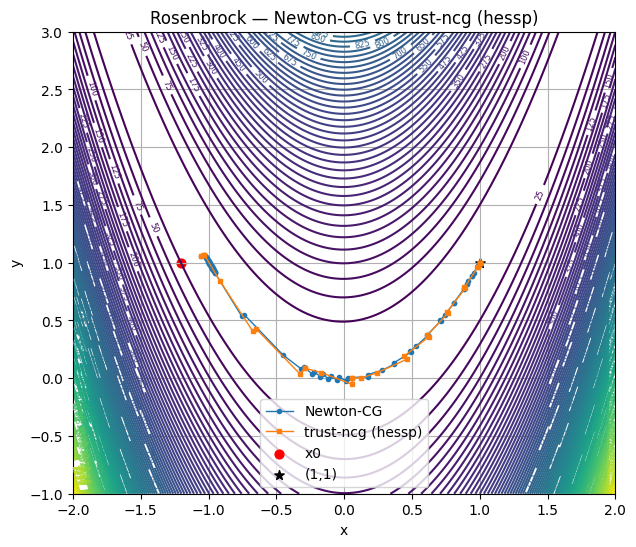

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

# --- Rosenbrock ---
def f_rosen(v):
    x,y=v
    return 100*(y - x**2)**2 + (1 - x)**2

def g_rosen(v):
    x,y=v
    return np.array([-400*x*(y - x**2) - 2*(1 - x),
                     200*(y - x**2)])

def H_rosen(v):
    x,y=v
    return np.array([[1200*x**2 - 400*y + 2, -400*x],
                     [-400*x,                 200   ]])

def hessp_rosen(x, p):
    """Producto Hessiana-vector sin formar H completa"""
    x1, y1 = x
    px, py = p
    H11 = 1200*x1**2 - 400*y1 + 2
    H12 = -400*x1
    H21 = -400*x1
    H22 = 200
    return np.array([H11*px + H12*py, H21*px + H22*py])

# --- Newton-CG con Hessiana explícita ---
x0 = np.array([-1.2, 1.0])
tray_newton=[]; cb_newton=lambda xk: tray_newton.append(xk.copy())

t0=time.time()
res_newton = minimize(f_rosen, x0, jac=g_rosen, hess=H_rosen,
                      method="Newton-CG", callback=cb_newton,
                      options={"xtol":1e-10,"maxiter":200})
t1=time.time()

tray_newton=np.array(tray_newton)

# --- trust-ncg con Hessp ---
tray_trust=[]; cb_trust=lambda xk: tray_trust.append(xk.copy())

t2=time.time()
res_trust = minimize(f_rosen, x0, jac=g_rosen, hessp=hessp_rosen,
                     method="trust-ncg", callback=cb_trust,
                     options={"gtol":1e-10,"maxiter":200})
t3=time.time()

tray_trust=np.array(tray_trust)

# --- Resultados ---
print("Método        | iters | f*        | ||grad|| final | tiempo [s]")
print("--------------|-------|-----------|----------------|-----------")
print(f"Newton-CG     | {res_newton.nit:5d} | {res_newton.fun: .3e} | {np.linalg.norm(g_rosen(res_newton.x)):.3e} | {t1-t0:.3f}")
print(f"trust-ncg     | {res_trust.nit:5d} | {res_trust.fun: .3e} | {np.linalg.norm(g_rosen(res_trust.x)):.3e} | {t3-t2:.3f}")

# --- Gráfico comparativo ---
xx=np.linspace(-2,2,600); yy=np.linspace(-1,3,600)
XX,YY=np.meshgrid(xx,yy)
ZZ=100*(YY-XX**2)**2+(1-XX)**2

plt.figure(figsize=(7,6))
cs=plt.contour(XX,YY,ZZ,levels=100)
plt.clabel(cs,inline=True,fontsize=6)

plt.plot(tray_newton[:,0],tray_newton[:,1],'o-',ms=3,lw=1,label="Newton-CG")
plt.plot(tray_trust[:,0],tray_trust[:,1],'s-',ms=3,lw=1,label="trust-ncg (hessp)")

plt.scatter([x0[0]],[x0[1]],c='r',s=40,label='x0')
plt.scatter([1],[1],c='k',s=50,marker='*',label='(1,1)')

plt.title("Rosenbrock — Newton-CG vs trust-ncg (hessp)")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(True)
plt.show()


##### **Tarea 2: Ajuste cuadrático por Newton.**

##### **Tarea 2: Ajuste cuadrático por Newton (mínimos cuadrados).**

**Problema:**  
Dado $A\in\mathbb{R}^{m\times n}$ con $m\ge n$ y $b\in\mathbb{R}^m$, considerar
\[
f(w)\;=\;\|Aw-b\|_2^2, \qquad w\in\mathbb{R}^n.
\]

- $A$: matriz de diseño (características).  
- $b$: vector de observaciones.  
- $w$: parámetros a estimar.  

---

**Generación de datos (usar esta receta salvo que se indique lo contrario):**

- Dimensiones: por defecto $m=200$, $n=10$.  
- Semilla: `np.random.seed(42)` para reproducibilidad.  
- $A$: matriz con entradas $\mathcal{N}(0,1)$. (Opcional: normalizar columnas).  
- $w_{\text{true}}$: vector $\mathcal{N}(0,1)$.  
- Ruido: $\varepsilon\sim\mathcal{N}(0,\sigma^2)$ con  
  $\sigma=10^{-2}\,\|A w_{\text{true}}\|_2/\sqrt{m}$.  
- Definir $b = A w_{\text{true}} + \varepsilon$.  

```python
np.random.seed(42)
m, n = 200, 10
A = np.random.randn(m, n)
A = A / (np.linalg.norm(A, axis=0, keepdims=True) + 1e-15)  # normalizar columnas (opcional)
w_true = np.random.randn(n)
noise = np.random.randn(m)
sigma = 1e-2 * np.linalg.norm(A @ w_true) / np.sqrt(m)
b = A @ w_true + sigma * noise
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

# --- Generación de datos ---
np.random.seed(42)
m, n = 200, 10
A = np.random.randn(m, n)
A = A / (np.linalg.norm(A, axis=0, keepdims=True) + 1e-15)  # normalizar columnas (opcional)

w_true = np.random.randn(n)
noise = np.random.randn(m)
sigma = 1e-2 * np.linalg.norm(A @ w_true) / np.sqrt(m)
b = A @ w_true + sigma * noise

# --- Definición de f(w), grad, Hess ---
def f_ls(w):
    r = A @ w - b
    return np.dot(r, r)

def g_ls(w):
    r = A @ w - b
    return 2 * A.T @ r

def H_ls(w):
    return 2 * (A.T @ A)

def hessp_ls(w, p):
    return 2 * (A.T @ (A @ p))

# --- Solución cerrada ---
w_closed = np.linalg.lstsq(A, b, rcond=None)[0]
f_closed = f_ls(w_closed)

# --- Optimización con Newton-CG ---
_tray=[]
cb=lambda wk: _tray.append(wk.copy())
x0 = np.zeros(n)

t0=time.time()
res = minimize(f_ls, x0, jac=g_ls, hess=H_ls,
               method="Newton-CG", callback=cb,
               options={"xtol":1e-10, "maxiter":200})
t1=time.time()

_tray = np.array(_tray)

print("[Mínimos cuadrados]")
print(f"Dimensiones: m={m}, n={n}")
print(f"Solución cerrada: f*={f_closed:.3e}")
print("------------------------------------------------")
print(f"Newton-CG: iters={res.nit}, f*≈{res.fun:.3e}, "
      f"||grad||≈{np.linalg.norm(g_ls(res.x)):.3e}, "
      f"tiempo={t1-t0:.4f}s")

# --- Comparación con w_true y w_closed ---
print("\nError vs w_true:", np.linalg.norm(res.x - w_true))
print("Error vs solución cerrada:", np.linalg.norm(res.x - w_closed))

# --- Gráfico de convergencia ---
plt.figure(figsize=(6,4))
f_vals = [f_ls(w) for w in _tray]
plt.semilogy(f_vals, 'o-', label="Newton-CG trajectory")
plt.axhline(f_closed, color='k', linestyle='--', label="f(w_closed)")
plt.xlabel("Iteración")
plt.ylabel("f(w)")
plt.title("Convergencia en mínimos cuadrados")
plt.legend(); plt.grid(True); plt.show()


#### **3) Método de la región de confianza**

Modelo cuadrático:
$$m_k(s)=f(x_k)+\nabla f(x_k)^\top s+\tfrac12 s^\top \nabla^2 f(x_k)s,$$

subproblema $\min_{\|s\|\le \Delta_k} m_k(s)$ y cociente
$$\rho_k=\frac{f(x_k)-f(x_k+s_k)}{m_k(0)-m_k(s_k)}.$$

Ajuste de $\Delta_k$ con $\eta_1<\eta_2$ y factores $\gamma_{\text{inc}},\gamma_{\text{dec}}$.


##### **Ejemplo 3: trust-ncg vs Newton-CG en función no convexa.**

**Problema:** $$f(x,y)=(x-2)^2+(y-1)^2+\text{sen}(3x)\text{sen}(3y).$$

**Objetivos:**  
1. Implementar $f,\nabla f,\nabla^2 f$.  
2. Resolver con `trust-ncg` y con `Newton-CG` (misma tolerancia).  
3. Graficar contornos + ambas trayectorias.  
4. Reportar iteraciones, $f$ final y $\|\nabla f\|$ final.

**Entrega esperada:**
- código, gráfico comparativo, métricas.

[Newton-CG] f*≈ -0.42507417030847716  iters: 8  ||grad||≈ 3.449734358613054e-09
[trust-ncg] f*≈ -0.664904817449893  iters: 7  ||grad||≈ 2.063164985248677e-10


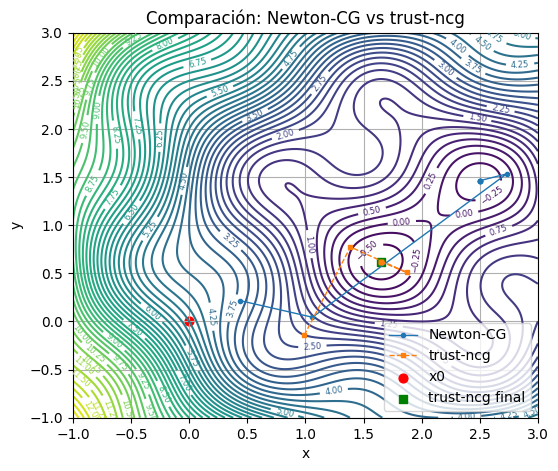

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f_nc(v):
    x,y=v; return (x-2)**2 + (y-1)**2 + np.sin(3*x)*np.sin(3*y)
def g_nc(v):
    x,y=v
    return np.array([2*(x-2)+3*np.cos(3*x)*np.sin(3*y),
                     2*(y-1)+3*np.sin(3*x)*np.cos(3*y)])
def H_nc(v):
    x,y=v
    sxy=np.sin(3*x)*np.sin(3*y); cxy=np.cos(3*x)*np.cos(3*y)
    return np.array([[2-9*sxy, 9*cxy],
                     [9*cxy,   2-9*sxy]])

x0 = np.array([0.0,0.0])

# Trayectorias
tray_nc=[]
def cb_nc(xk): tray_nc.append(xk.copy())
res_nc = minimize(f_nc, x0, jac=g_nc, hess=H_nc, method="Newton-CG",
                  callback=cb_nc, options={"xtol":1e-10,"maxiter":200})

tray_tr=[]
def cb_tr(xk): tray_tr.append(xk.copy())
res_tr = minimize(f_nc, x0, jac=g_nc, hess=H_nc, method="trust-ncg",
                  callback=cb_tr, options={"gtol":1e-10,"maxiter":200})

print("[Newton-CG] f*≈",res_nc.fun," iters:",res_nc.nit," ||grad||≈",np.linalg.norm(g_nc(res_nc.x)))
print("[trust-ncg] f*≈",res_tr.fun," iters:",res_tr.nit," ||grad||≈",np.linalg.norm(g_nc(res_tr.x)))

# Contornos + trayectorias
xx=np.linspace(-1,3,500); yy=np.linspace(-1,3,500)
XX,YY=np.meshgrid(xx,yy); ZZ=(XX-2)**2 + (YY-1)**2 + np.sin(3*XX)*np.sin(3*YY)
plt.figure(figsize=(6,5))
cs=plt.contour(XX,YY,ZZ,levels=60); plt.clabel(cs,inline=True,fontsize=6)
if tray_nc:
    tn=np.array(tray_nc); plt.plot(tn[:,0],tn[:,1],'o-',ms=3,lw=1,label="Newton-CG")
if tray_tr:
    tt=np.array(tray_tr); plt.plot(tt[:,0],tt[:,1],'s--',ms=3,lw=1,label="trust-ncg")
plt.scatter([x0[0]],[x0[1]],c='r',s=40,label='x0')
plt.scatter([res_tr.x[0]],[res_tr.x[1]],c='g',s=35,marker='s',label='trust-ncg final')
plt.title("Comparación: Newton-CG vs trust-ncg"); plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(True); plt.show()


##### **Tarea 1: Región de confianza 1D (de teoría a código).**

**Descripción:**   
Implementar región de confianza 1D en
$$ f(x)=(x-2)^2+\text{sen}^2(3x)$$
desde $x_0=1.5$ con $\eta_1=0.25,\eta_2=0.75,\gamma_{\text{inc}}=2,\gamma_{\text{dec}}=0.5$.

**Objetivos:**
1. Codificar $f', f''$ y el modelo $m_k(s)$.
2. Resolver el subproblema $|s|\le \Delta_k$ (si $f''(x_k)<0$, recorte en el borde).
3. Actualizar $\rho_k,\Delta_k$; registrar pasos aceptados/rechazados.

**Entrega:**
- tabla $(k,x_k,\Delta_k,\rho_k)$ + gráfico de $f$ con los pasos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Parámetros del algoritmo ---
eta1, eta2 = 0.25, 0.75
gamma_inc, gamma_dec = 2.0, 0.5
x0 = 1.5
Delta0 = 0.5
Delta_max = 10.0
tol_grad = 1e-10
tol_step = 1e-12
max_iter = 50

# --- Función y derivadas ---
def f(x):
    return (x - 2.0)**2 + np.sin(3.0*x)**2

def g(x):
    # f' = 2(x-2) + derivative of sin^2(3x) = 3*sin(6x)
    return 2.0*(x - 2.0) + 3.0 * np.sin(6.0*x)

def h(x):
    # f'' = 2 + derivative of 3*sin(6x) = 18*cos(6x)
    return 2.0 + 18.0 * np.cos(6.0*x)

def model_m(xk, s):
    # quadratic model m_k(s) = f(xk) + gk*s + 1/2 hk s^2
    gk = g(xk); hk = h(xk)
    return f(xk) + gk*s + 0.5*hk*s*s

# --- Trust-region 1D loop ---
history = []  # will store dicts for DataFrame
xk = float(x0)
Delta_k = float(Delta0)
accepted_count = 0
rejected_count = 0

for k in range(max_iter):
    fk = f(xk)
    gk = g(xk)
    hk = h(xk)

    # Solve subproblem: minimize m_k(s) s.t. |s| <= Delta_k
    if hk > 0:
        s_uncon = - gk / hk
        # clip to trust region
        s = np.clip(s_uncon, -Delta_k, Delta_k)
    else:
        # Hessian negative (concave) => minimizer at boundary opposite to gradient sign
        # choose s = -Delta_k * sign(gk) (so that gk*s < 0)
        if gk == 0:
            s = -Delta_k  # arbitrary boundary
        else:
            s = -Delta_k * np.sign(gk)

    if abs(s) < tol_step:
        # step too small -> stop
        rho_k = np.nan
        history.append({
            "k": k, "xk_before": xk, "Delta_before": Delta_k,
            "rho_k": rho_k, "accepted": True, "s": s,
            "f_before": fk, "f_after": f(xk + s)
        })
        break

    # Evaluate actual and predicted reduction
    fk_new = f(xk + s)
    actual_red = fk - fk_new
    predicted_red = (f(xk) - model_m(xk, s))

    # Protect against tiny predicted_red
    if abs(predicted_red) < 1e-16:
        rho_k = np.inf if actual_red > 0 else -np.inf
    else:
        rho_k = actual_red / predicted_red

    # Accept / reject and update Delta
    accepted = False
    if rho_k < eta1:
        # reject
        Delta_k = max(1e-12, gamma_dec * Delta_k)
        rejected_count += 1
        accepted = False
    else:
        # accept
        xk = xk + s
        accepted_count += 1
        accepted = True
        if rho_k > eta2:
            Delta_k = min(Delta_max, gamma_inc * Delta_k)
        # if eta1 <= rho <= eta2 : keep Delta_k unchanged

    history.append({
        "k": k, "xk_before": (xk - s) if accepted else xk,
        "Delta_before": (Delta_k / gamma_inc) if (accepted and rho_k > eta2) else Delta_k,
        "rho_k": rho_k, "accepted": accepted, "s": s,
        "f_before": fk, "f_after": (fk_new if accepted else fk_new)
    })

    # Stopping on small gradient
    if abs(g(xk)) < tol_grad:
        break

# --- Convert history to DataFrame and print table ---
df = pd.DataFrame(history)
# Reformat some columns for readability
df = df[["k", "xk_before", "Delta_before", "rho_k", "accepted", "s", "f_before", "f_after"]]
pd.set_option("display.max_rows", None)
print("\nTabla de historial (cada fila: k, xk, Delta, rho, accepted, s, f_before, f_after):\n")
print(df.to_string(index=False))

print(f"\nResumen: aceptados = {accepted_count}, rechazados = {rejected_count}")
print(f"Último x ≈ {xk:.9f}, f(x) ≈ {f(xk):.9f}, ||g|| ≈ {abs(g(xk)):.3e}")

# --- Gráfico de f y los pasos ---
xx = np.linspace(0.5, 2.5, 1000)
yy = f(xx)

plt.figure(figsize=(9,5))
plt.plot(xx, yy, label="f(x) = (x-2)^2 + sin^2(3x)")

# plot steps: for each row, mark attempted step and show accepted/rejected
for row in history:
    x_before = row["xk_before"]
    s = row["s"]
    x_after = x_before + s
    f_before = row["f_before"]
    f_after = f(x_after)

    if row["accepted"]:
        # green arrow from x_before to x_after
        plt.annotate("", xy=(x_after, f_after), xytext=(x_before, f_before),
                     arrowprops=dict(arrowstyle="->", color="green", lw=1.5))
        plt.scatter([x_after], [f_after], c="green")
    else:
        # dashed red line showing attempted move and red cross at trial point
        plt.plot([x_before, x_after], [f_before, f_after], 'r--', alpha=0.7)
        plt.scatter([x_after], [f_after], marker='x', c='red', s=40)

# initial point
plt.scatter([x0], [f(x0)], c='blue', s=60, label="x0")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.title("Región de confianza 1D: pasos (verde=aceptado, rojo=rechazado)")
plt.grid(True); plt.legend()
plt.show()


##### **Tarea 2: Robustez vs backtracking (multi-inicialización).**

**Descripción:**   
En el mismo $f(x,y)$ del ejemplo, comparar `trust-ncg` con **GD(Descenso de gradiente)+Armijo** desde **3 puntos iniciales** distintos.

**Objetivos:**
- Correr ambos métodos desde cada $x_0$.
- Reportar $f$ final, $\|\nabla f\|$ y #iteraciones.
- Graficar las 6 trayectorias y discutir estabilidad/sensibilidad.

**Entrega:**
- código, tabla comparativa, gráfico.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ---- Definición de la función ----
def f_nc(v):
    x,y=v
    return (x-2)**2 + (y-1)**2 + np.sin(3*x)*np.sin(3*y)

def g_nc(v):
    x,y=v
    return np.array([2*(x-2)+3*np.cos(3*x)*np.sin(3*y),
                     2*(y-1)+3*np.sin(3*x)*np.cos(3*y)])

def H_nc(v):
    x,y=v
    sxy=np.sin(3*x)*np.sin(3*y); cxy=np.cos(3*x)*np.cos(3*y)
    return np.array([[2-9*sxy, 9*cxy],
                     [9*cxy,   2-9*sxy]])

# ---- Descenso de Gradiente con Armijo ----
def gd_armijo(x0, alpha0=1.0, beta=0.5, sigma=1e-4, tol=1e-8, maxit=500):
    x = x0.copy()
    tray = [x.copy()]
    for k in range(maxit):
        g = g_nc(x)
        if np.linalg.norm(g) < tol:
            break
        d = -g
        # Armijo backtracking
        alpha = alpha0
        while f_nc(x + alpha*d) > f_nc(x) + sigma*alpha*np.dot(g,d):
            alpha *= beta
        x = x + alpha*d
        tray.append(x.copy())
    return x, f_nc(x), np.linalg.norm(g_nc(x)), k+1, np.array(tray)

# ---- Trust Region (trust-ncg con SciPy) ----
def trust_region(x0):
    tray=[]
    def cb(xk): tray.append(xk.copy())
    res = minimize(f_nc, x0, jac=g_nc, hess=H_nc, method="trust-ncg",
                   callback=cb, options={"gtol":1e-8,"maxiter":500})
    return res.x, res.fun, np.linalg.norm(g_nc(res.x)), res.nit, np.array(tray)

# ---- Experimentos ----
x0_list = [np.array([0.0,0.0]), np.array([3.0,3.0]), np.array([-1.0,2.5])]
results = []

plt.figure(figsize=(7,6))
xx=np.linspace(-1,3.5,400); yy=np.linspace(-1,3.5,400)
XX,YY=np.meshgrid(xx,yy)
ZZ=(XX-2)**2+(YY-1)**2+np.sin(3*XX)*np.sin(3*YY)
cs=plt.contour(XX,YY,ZZ,levels=60,alpha=0.7)
plt.clabel(cs,inline=True,fontsize=6)

for i,x0 in enumerate(x0_list):
    # GD+Armijo
    xgd, fgd, ggd, nitgd, traygd = gd_armijo(x0)
    # Trust-NCG
    xtr, ftr, gtr, nittr, traytr = trust_region(x0)

    results.append([i+1,"GD-Armijo",fgd,ggd,nitgd])
    results.append([i+1,"trust-ncg",ftr,gtr,nittr])

    # Graficar trayectorias
    if traygd.size>0:
        plt.plot(traygd[:,0],traygd[:,1],'o-',ms=3,lw=1,
                 label=f"GD-Armijo (x0{i+1})")
    if traytr.size>0:
        plt.plot(traytr[:,0],traytr[:,1],'s--',ms=3,lw=1,
                 label=f"trust-ncg (x0{i+1})")

plt.scatter([p[0] for p in x0_list],[p[1] for p in x0_list],
            c='r',s=40,label='x0')
plt.title("Trayectorias GD+Armijo vs trust-ncg")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(fontsize=7); plt.grid(True); plt.show()

# ---- Tabla comparativa ----
import pandas as pd
tabla = pd.DataFrame(results,columns=["x0_id","Método","f_final","||grad||","Iteraciones"])
print(tabla.to_string(index=False))


#### **4) Multiplicadores de Lagrange (restricciones)**

Para igualdad $h(x)=0$, el **lagrangiano**:
$$ \mathcal{L}(x,\lambda)=f(x)+\lambda^\top h(x),$$
y condiciones de primer orden (o FOC - First Order Conditions):
$$\nabla_x \mathcal{L}(x^*,\lambda^*)=0,\qquad h(x^*)=0.$$

Para desigualdades se amplía a KKT (Karush-Kuhn-Tucker, no cubierto a fondo aquí).

##### **Ejemplo 4: igualdad lineal (analítico + numérico).**

**Problema:**    
Minimizar $f(x,y)=x^2+y^2$ s.a. $x+y-1=0$.

**Objetivos:**
1. Resolver **analíticamente** con multiplicador de Lagrange.
2. Resolver con `scipy.optimize.minimize` + `LinearConstraint`.
3. Comparar $x^*$ y $f(x^*)$ (analítico vs numérico).

**Entrega esperada:**   
- derivación corta + código y verificación.

In [ ]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint

def f_xy(v): x,y=v; return x**2 + y**2
def g_xy(v): x,y=v; return np.array([2*x, 2*y])

A = np.array([[1.0, 1.0]])
lc = LinearConstraint(A, lb=np.array([1.0]), ub=np.array([1.0]))

x0 = np.array([0.0, 0.0])
res_eq = minimize(f_xy, x0, jac=g_xy, method="trust-constr",
                  constraints=[lc], options={"gtol":1e-12,"maxiter":200})

x_star_ana = np.array([0.5, 0.5])
print("Igualdad lineal — Numérico:  x* =", res_eq.x, " f* ≈", f_xy(res_eq.x))
print("Igualdad lineal — Analítico: x* =", x_star_ana, " f* ≈", f_xy(x_star_ana))

Igualdad lineal — Numérico:  x* = [0.5 0.5]  f* ≈ 0.49999999999999967
Igualdad lineal — Analítico: x* = [0.5 0.5]  f* ≈ 0.5


##### **Tarea 1: Dos igualdades lineales.**

**Descripción:**   
Minimizar $f(x,y)=x^2+y^2$ s.a. $2x+y=4$ y $x-y=0$.

**Objetivos:**  
1. Resolver por Lagrange con $\lambda_1,\lambda_2$ (mostrá el sistema y $x=y=4/3$).  
2. Verificar con `LinearConstraint` y comparar $f(x^*)$.

**Entrega:**
- derivación + código.

In [ ]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint

# ---- Función y gradiente ----
def f_xy(v):
    x,y = v
    return x**2 + y**2

def g_xy(v):
    x,y = v
    return np.array([2*x, 2*y])

# ---- Restricciones ----
# 2x + y = 4
# x - y = 0
A = np.array([[2.0, 1.0],
              [1.0, -1.0]])
lc = LinearConstraint(A, lb=np.array([4.0, 0.0]), ub=np.array([4.0, 0.0]))

# ---- Punto inicial ----
x0 = np.array([0.0, 0.0])

# ---- Optimización numérica ----
res = minimize(f_xy, x0, jac=g_xy, method="trust-constr",
               constraints=[lc], options={"gtol":1e-12,"maxiter":200})

# ---- Solución analítica ----
x_star_ana = np.array([4/3, 4/3])

# ---- Resultados ----
print("=== Solución Numérica ===")
print("x* =", res.x, " f* ≈", f_xy(res.x))
print("\n=== Solución Analítica ===")
print("x* =", x_star_ana, " f* ≈", f_xy(x_star_ana))


##### **Tarea 2: Restricción no lineal (circunferencia).**

**Descripción:**    
Minimizar $f(x,y)=(x-1)^2+(y-2)^2$ s.a. $h(x,y)=x^2+y^2-1=0$.

**Objetivos:**
1. Plantear $\mathcal{L}$, FOC y hallar candidatos sobre el círculo.
2. Implementar `NonlinearConstraint` (con jacobiano) y resolver con `trust-constr`.
3. Comparar soluciones (analítica vs numérica) y valores de $f$.

**Entrega:**
- derivación, código y comparación.

**Fragmento de código sugerido**
```python
from scipy.optimize import NonlinearConstraint

def h_circle(v): x,y=v; return x**2 + y**2 - 1.0
def Jh_circle(v): x,y=v; return np.array([2*x, 2*y])  # jacobiano (como gradiente de h)

# Ejemplo de plantilla:
# nlc = NonlinearConstraint(h_circle, lb=np.array([0.0]), ub=np.array([0.0]), jac=Jh_circle)
# res_nl = minimize(lambda v:(v[0]-1)**2+(v[1]-2)**2, x0=[0.5,0.5],
#                   jac=lambda v: np.array([2*(v[0]-1), 2*(v[1]-2)]),
#                   method="trust-constr", constraints=[nlc],
#                   options={"gtol":1e-10,"maxiter":500})
# print("No lineal — Numérico:", res_nl.x, " f*≈", (res_nl.fun))
```

In [ ]:
import numpy as np
from scipy.optimize import minimize, NonlinearConstraint

# ---- Función y gradiente ----
def f_xy(v):
    x,y=v
    return (x-1)**2 + (y-2)**2

def g_xy(v):
    x,y=v
    return np.array([2*(x-1), 2*(y-2)])

# ---- Restricción no lineal: x^2+y^2-1=0 ----
def h_circle(v):
    x,y=v
    return x**2 + y**2 - 1.0

def Jh_circle(v):
    x,y=v
    return np.array([2*x, 2*y])   # gradiente de h

nlc = NonlinearConstraint(h_circle, lb=[0.0], ub=[0.0], jac=Jh_circle)

# ---- Optimización numérica ----
x0 = [0.5,0.5]
res = minimize(f_xy, x0, jac=g_xy, method="trust-constr",
               constraints=[nlc],
               options={"gtol":1e-10,"maxiter":1000})

# ---- Solución analítica ----
x_star_ana = np.array([1/np.sqrt(5), 2/np.sqrt(5)])
f_star_ana = f_xy(x_star_ana)

# ---- Mostrar resultados ----
print("=== Solución Numérica ===")
print("x* =", res.x, " f* ≈", res.fun)

print("\n=== Solución Analítica ===")
print("x* =", x_star_ana, " f* ≈", f_star_ana)
